<a href="https://colab.research.google.com/github/FilipeDias01/FilipeDias01/blob/main/Project1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Group C Project -  Regression*
---

                                                            This notebook uses the songs_popularity.xlsx dataset

## Team Formation:

|Beatriz Ferreira |Filipe Dias|Francisco Afonso|Gabriella Antoniazzi|
|:-----|:----|:-----|:----|
|M20210752 |M20210276 | M20210156 | M20210742
|M20210752@novaims.unl.pt |M20210276@novaims.unl.pt |M20210156@novaims.unl.pt | M20210742@novaims.unl.pt




## 1. Project Desription

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant.</p>
<p>Your customer is the marketing department of record company who whishes to build a model to *predict the popularity of songs based on the songs' features*. The company wants to use the predicted popularity as a measure to define the promotion budget for each song.</p>
<p>A real case of this use of model is described on the book "Automate This" by Christopher Steiner. More info at https://www.amazon.com/Automate-This-Algorithms-Came-World/dp/B00D9T9IQG </p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructors. The instructors will also act as the company business/project stakeholder.

## 2. Dataset description

- **song_name**: name of the song
- **song_popularity (target)**: popularity of the song
- **song_duration_ms**: duration of the song in milliseconds
- **acousticness**: accousticness of the song <br>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **originality**: originality of the song (how different is the song from other songs)
- **danceability**: danceability of the song<br>
Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
- **energy**: energy of the song <br>
Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- **instrumentalness**: instrumentalness of the song <br>
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.
- **key**: key of the song (for more info check https://en.wikipedia.org/wiki/Key_(music)) <br>
The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
<br>
In music theory, the key of a piece is the group of pitches, or scale, that forms the basis of a musical composition in classical, Western art, and Western pop music.The key may be in the major or minor mode, though musicians assume major when this is not specified, e.g., "This piece is in C" implies that the key of the song is C major.The key usually identifies the tonic note and/or chord: the note and/or major or minor triad that represents the final point of rest for a piece, or the focal point of a section.
- **liveness**: liveness of the song <br>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- **loudness**: loudness of the song <br>
 The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
- **audio_mode**: song's mode (for more info check https://en.wikipedia.org/wiki/Mode_(music))<br>
Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness**: speechiness of the song <br>
This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- **tempo**: tempo of the song <br>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.
- **time_signature**: time signature of the song (for more info check https://en.wikipedia.org/wiki/Time_signature) <br>
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- **audio_valence**: audio valence of the song <br>
Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
 


## *3. Initial Configuration + Libraries and Packages*

In [ ]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from yellowbrick.model_selection import RFECV
from yellowbrick.model_selection import LearningCurve
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

ModuleNotFoundError: ignored

In [ ]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 14

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

## *4.Data Understanding*


### 4.1 Data Collect

In [ ]:
# Loading the dataset and visualizing summary statistics
df = pd.read_excel('songs_popularity.xlsx', engine='openpyxl')


In [ ]:
df = df.sort_values(by='song_popularity', ascending=True)

df.head(50)

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10479,Forastero,0,267687,0.212000,NaN,0.591,0.826,0.000000,9,0.1070,-5.899,0,0.2430,173.823,4,0.8430
9995,Trouble Adjusting,0,222933,0.011000,NaN,0.363,0.824,0.000000,4,0.1050,-3.316,1,0.0405,118.660,4,0.1640
4014,Saturday Night's Alright For Fighting,0,224306,0.026100,NaN,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.7200
18551,Many Lives,0,286066,0.183000,54.0,0.637,0.749,0.088300,6,0.1530,-5.659,1,0.0310,99.973,4,0.3340
4017,Teddy Picker,0,165000,0.000286,NaN,0.637,0.963,0.000889,9,0.0449,-5.116,1,0.0882,150.100,4,0.8230
4018,Back for More,0,202560,0.000007,NaN,0.452,0.996,0.000002,9,0.2200,-2.342,1,0.1140,152.010,4,0.1680
4022,Show Me the Way,0,186026,0.001420,NaN,0.549,0.935,0.000000,2,0.2950,-3.350,1,0.0545,150.053,4,0.7810
9982,Hold Us Together,0,221322,0.026700,NaN,0.447,0.812,0.000000,0,0.1320,-5.356,1,0.0609,145.163,4,0.4650
4030,Ludacris,0,183771,0.027700,NaN,0.792,0.747,0.000000,11,0.1170,-8.753,0,0.3420,94.498,4,0.5840
1233,Transformer (feat. Nicki Minaj),0,196333,0.001510,NaN,0.753,0.616,0.000007,2,0.2910,-7.340,1,0.1650,156.830,4,0.2870


### 4.2 Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 10479 to 5593
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_durations_s  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18829 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.8+ MB


In [ ]:
# Show top rows
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
10479,Forastero,0,267687,0.212000,NaN,0.591,0.826,0.000000,9,0.1070,-5.899,0,0.2430,173.823,4,0.843
9995,Trouble Adjusting,0,222933,0.011000,NaN,0.363,0.824,0.000000,4,0.1050,-3.316,1,0.0405,118.660,4,0.164
4014,Saturday Night's Alright For Fighting,0,224306,0.026100,NaN,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.720
18551,Many Lives,0,286066,0.183000,54.0,0.637,0.749,0.088300,6,0.1530,-5.659,1,0.0310,99.973,4,0.334
4017,Teddy Picker,0,165000,0.000286,NaN,0.637,0.963,0.000889,9,0.0449,-5.116,1,0.0882,150.100,4,0.823


### 4.3 Data Exploration

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_name,18835,13070,Better,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song_popularity,18835.0,NaN,NaN,NaN,52.991877,21.905654,0.0,40.0,56.0,69.0,100.0
song_duration_ms,18835.0,NaN,NaN,NaN,217.731776,59.885012,12.0,184.0,211.0,242.0,1799.0
acousticness,18835.0,NaN,NaN,NaN,0.258539,0.288719,0.000001,0.0241,0.132,0.424,0.996
danceability,18835.0,NaN,NaN,NaN,0.633348,0.156723,0.0,0.533,0.645,0.748,0.987
energy,18835.0,NaN,NaN,NaN,0.644995,0.214101,0.00107,0.51,0.674,0.815,0.999
instrumentalness,18829.0,NaN,NaN,NaN,0.080157,0.264622,0.0,0.0,0.000011,0.00259,10.0
key,18835.0,NaN,NaN,NaN,5.289196,3.614595,0.0,2.0,5.0,8.0,11.0
liveness,18835.0,NaN,NaN,NaN,0.17965,0.143984,0.0109,0.0929,0.122,0.221,0.986
loudness,18835.0,NaN,NaN,NaN,-7.447435,3.827831,-38.768,-9.044,-6.555,-4.908,1.585


- Song Name - Existem músicas com o mesmo nome. No index. conseguimos ver alguns deles são mesmo valores duplicados, já outras são apenas outras músicas. 
    -  **Exemplo**:
     - *Index* [7571+7626+10892] - Possuem as mesmas features. O que salta à primeira vista é a duração da música que é igual, no entanto, ao longo da linha consegue-se perceber que os valores são todos iguais.
     - *Index* (12079) - Valor diferente, mas com outros números.
- Song_Popularity - A variável principal e que nos vai permitir realizar o modelo. É a feature que vai disponibilizar que consigamos instalar um modeling de supervised learning. Para além disso, é uma variável com percentagem.
- Song_duration_ms - Valor minimo + Valor máximo = Absurdo . 12 segundos de música ou 29 Minutos de música. Valores podem ser justificados caso sejam Jiggles ou Concertos ao vivo, no entanto, podemos trocar os valores para segundos.
- Accousticness - Muitas das músicas do dataset não são caracterizadas como acusticas. Conseguimos ver isso tanto pelo a média como pela mediana. Podemos multiplicar para ficar em percentagem.
- Originalidade - uma variavel que à primeira vista para estar bem distribuida. A média diz-nos que pelo menos mais que metade das músicas podem ser caracterizadas como originais 
- Danceability - Pela média assistimos que maior parte dos números são dançaveis. Quando vimos o primeiro quartil, os valores disparam logo para 50%.
- Energy - Semelhante a danceability. Normalmente, existe uma ligação entre músicas energéticas e dançaveis.
- Instrumentalness - Presença de outliers. Se for um ratio como aos outros, tem valores estranhos.
- Key - Não existe nenhum valor negativo, logo todas as keys foram identificadas. A média encontra-se no Fá.
- Liveness - Maior parte das músicas não são em live. 
- Loudness  - Existe pelo menos um valor que está fora da amplitude. Pelo percebido, os valores variam entre -60 a 0, no entanto existe um valor positivo
- Audio_mode
- Speechiness - Com valores baixos, entendemos que muito deles não são músicas cantadas. pelo menos, 75% não existe a confiança necessária para entender tal coisa.
- Tempo - Valor máximo que salta à primeira vista como também o desvio padrão. 
- Time_signature - Existem de missing values. Valores com 0 não é uma possibilidade neste variável.
- Audio_valence - A variável mostra que tanto existem músicas positivas como negativas.



### 4.3.1 Data Exploration using Data Visualization


Text(0.5, 0, 'Percentage %')

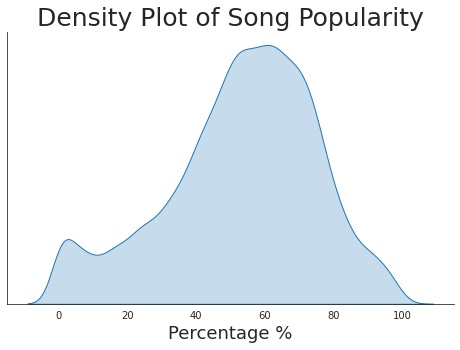

In [ ]:
# Checking Distribution by Visualization(Song Popularity)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='song_popularity',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of Song Popularity", fontsize=25)
plt.xticks()
plt.xlabel('Percentage %', fontsize=18)

Text(0.5, 0, 'Score from 4.0 to 5.0')

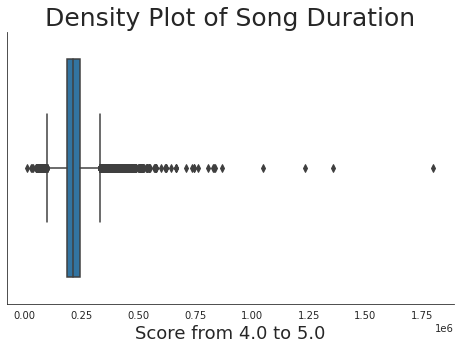

In [ ]:
# Checking Distribution by Visualization(Song Duration)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.boxplot(x='song_duration_ms',data=df)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of Song Duration", fontsize=25)
plt.xticks()
plt.xlabel('Score from 4.0 to 5.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

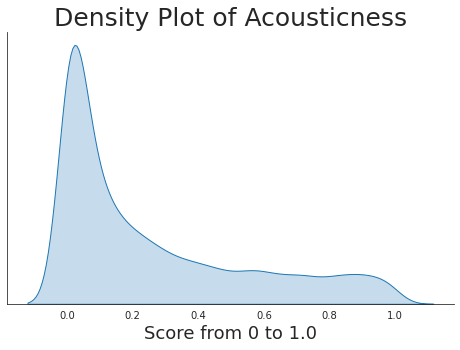

In [ ]:
# Checking Distribution by Visualization(Acousticness)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='acousticness',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of Acousticness", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

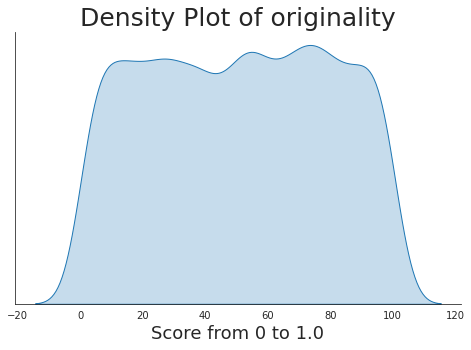

In [ ]:
# Checking Distribution by Visualization(originality)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='originality',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of originality", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

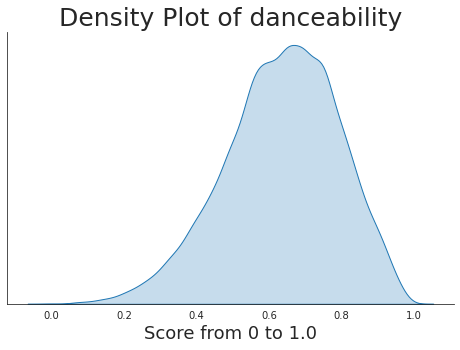

In [ ]:
# Checking Distribution by Visualization(danceability)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='danceability',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of danceability", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

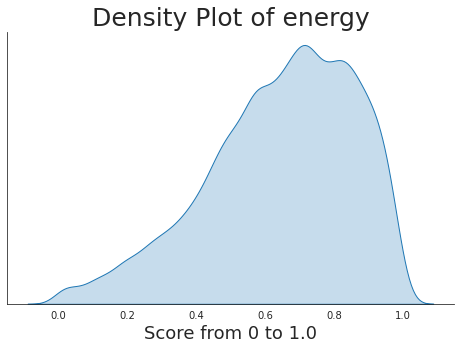

In [ ]:
# Checking Distribution by Visualization(energy)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='energy',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of energy", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

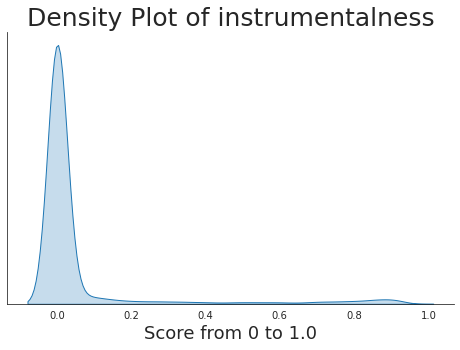

In [ ]:
# Checking Distribution by Visualization(instrumentalness)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='instrumentalness',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of instrumentalness", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

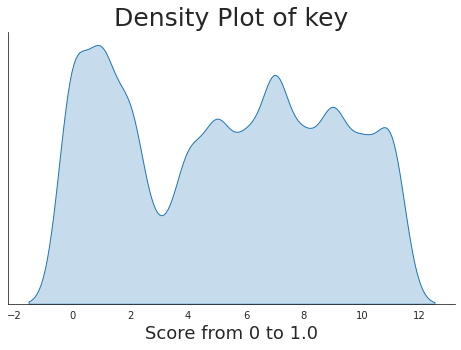

In [ ]:
# Checking Distribution by Visualization(key)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='key',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of key", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

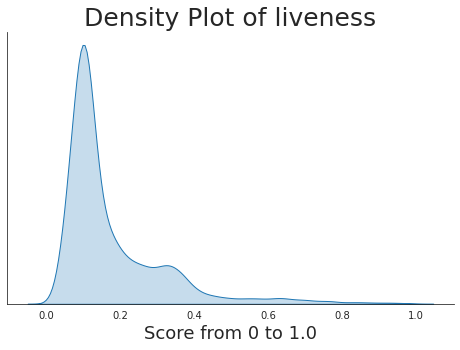

In [ ]:
# Checking Distribution by Visualization(liveness)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='liveness',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='liveness')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of liveness", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

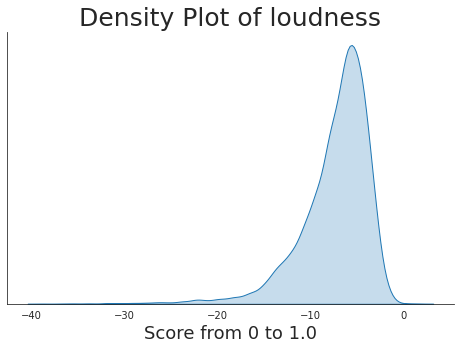

In [ ]:
# Checking Distribution by Visualization(loudness)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='loudness',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of loudness", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

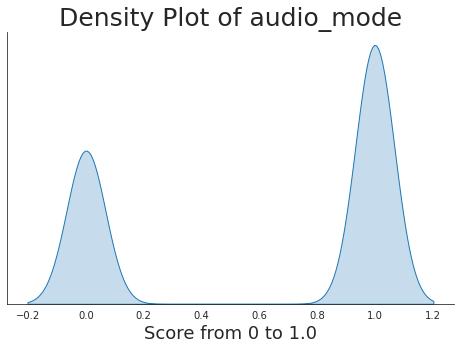

In [ ]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='audio_mode',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of audio_mode", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

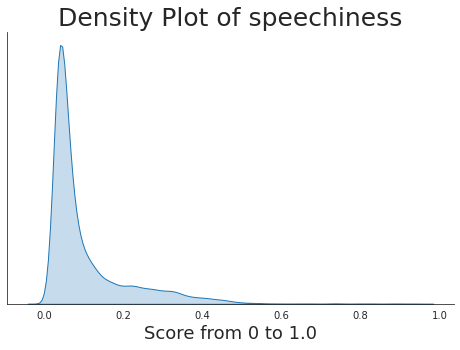

In [ ]:
# Checking Distribution by Visualization(speechiness)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='speechiness',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='speechiness')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of speechiness", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

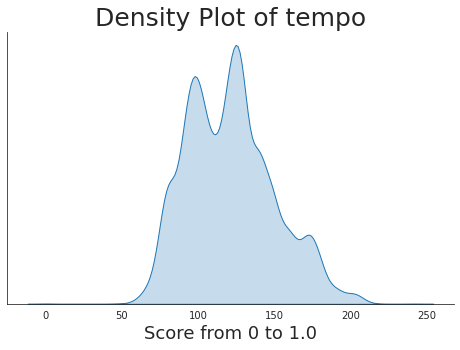

In [ ]:
# Checking Distribution by Visualization(Tempo)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='tempo',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of tempo", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

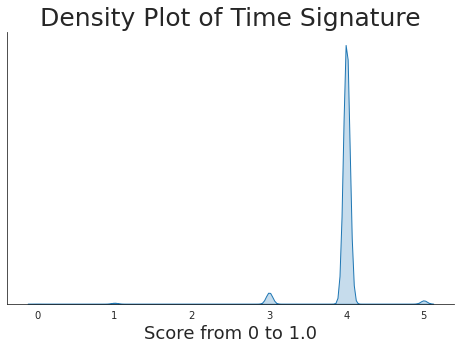

In [ ]:
# Checking Distribution by Visualization(time_signature)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='time_signature',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of Time Signature", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

Text(0.5, 0, 'Score from 0 to 1.0')

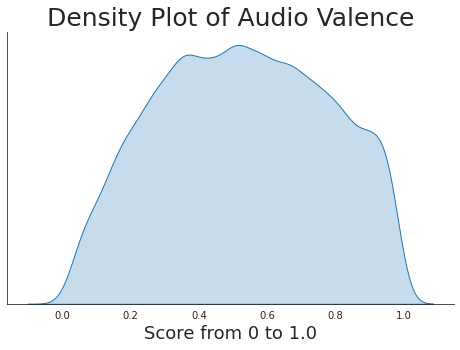

In [ ]:
# Checking Distribution by Visualization(Audio Valence)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8,5))
gr= sns.kdeplot(x='audio_valence',data=df,shade=True)
gr.set(xlabel='Global Rating')
gr.set(title='Global Rating 4.0 to 5.0')
gr.set(ylabel=None)
sns.despine()
gr.set(yticklabels=[])
plt.title("Density Plot of Audio Valence", fontsize=25)
plt.xticks()
plt.xlabel('Score from 0 to 1.0', fontsize=18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


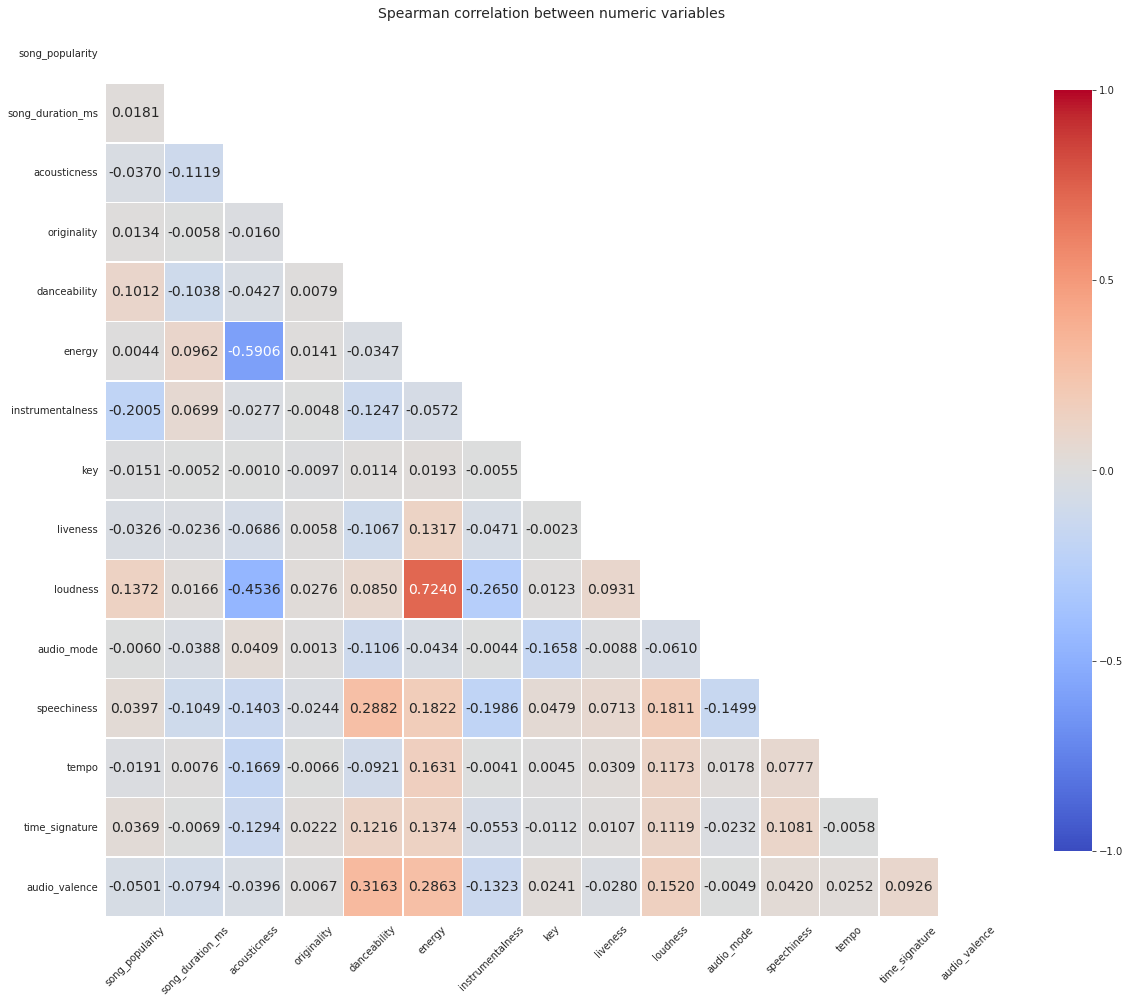

In [ ]:
# CORRELATION OF ALL NUMERICAL VARIABLES 
## Creation of a list in the dataset
numerical= df.select_dtypes(include=[np.number]).columns.tolist()
# Create correlation matrix
corr = df[numerical].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(20,35))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2926245d0>,
      dtype=object)

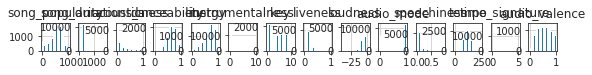

In [ ]:
# Histograms on all numerical variables

numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=20, figsize=(20,20), layout =(30,30))

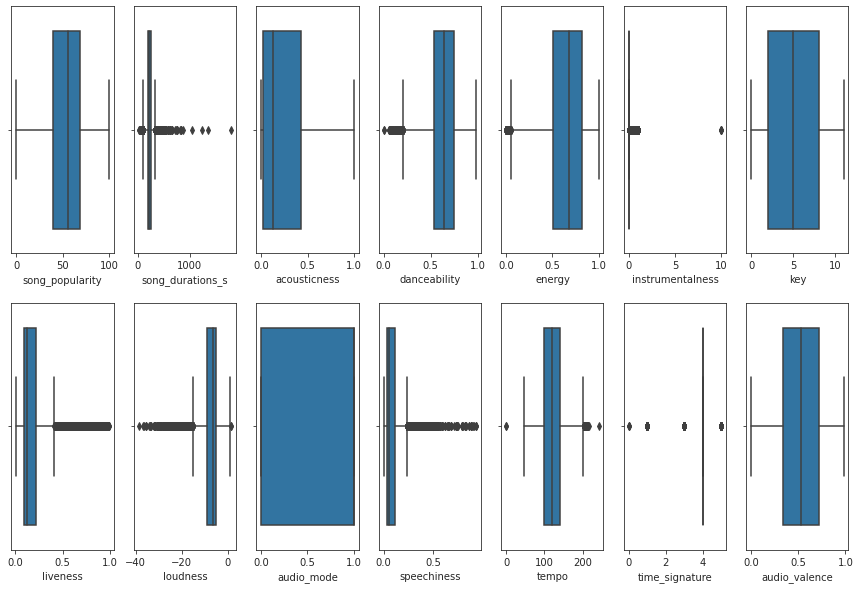

In [ ]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(2, 7, figsize=(15, 10))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(x=df[var], ax=subplot)
    

KeyError: ignored

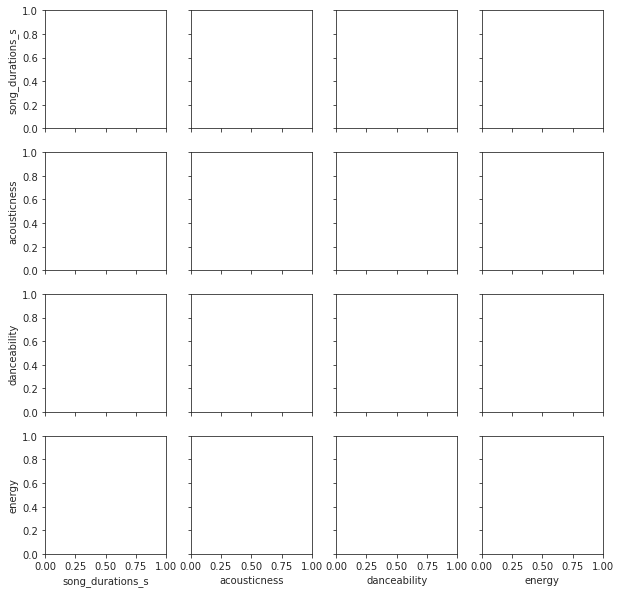

In [ ]:
# Pair plot some of the numerical variables with Smoker
cols=['song_durations_s','acousticness','danceability','energy']
g = sns.pairplot(df[cols], hue="audio_mode")

### 4.3.1 Data Quality


In [ ]:
# Check cardinality of key
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    print(df['key'].value_counts())

0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


In [ ]:
# Check cardinality of audio_mode
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    print(df['audio_mode'].value_counts())

1    11831
0     7004
Name: audio_mode, dtype: int64


In [ ]:
# Check cardinality of time_signature
with pd.option_context('display.max_rows', None,'display.max_columns', None):
    print(df['time_signature'].value_counts())

4    17754
3      772
5      233
1       73
0        3
Name: time_signature, dtype: int64


In [ ]:
#Looking For missing Values
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    6
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [ ]:
df.duplicated(subset=['song_name'])

10479    False
9995     False
4014     False
18551    False
4017     False
         ...  
11697     True
7636      True
14176     True
7568      True
5593      True
Length: 18835, dtype: bool

## 5. Data Preparation

In [ ]:
# Create a modeling dataset from the original dataset
X = df.copy(deep=True)

In [ ]:
# Remove Originality
X.drop(['originality'], axis='columns', inplace=True)

In [ ]:
# Ms to Seconds
X['song_duration_ms'] = X['song_duration_ms'] // 1000

In [ ]:
# Renaming the Column
X.rename(columns={'song_duration_ms': 'song_durations_s'}, inplace=True)

In [ ]:
# Find and remove outliers

# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Find and remove outliers
cols = ['song_durations_s', 'danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature']
X = removeOutliers(X, colList=cols , lowPercentile=0.01, highPercentile=0.99, verbose=True)

      song_durations_s  danceability  energy  instrumentalness  liveness  \
0.01            104.34       0.23234  0.0735             0.000  0.038534   
0.99            414.00       0.93300  0.9800             0.934  0.750660   

      loudness  speechiness      tempo  time_signature  
0.01 -21.97294        0.026   69.97174             3.0  
0.99  -2.14736        0.458  193.19504             5.0  


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 10479 to 5593
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_durations_s  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18829 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.8+ MB
